In [1]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Vader_op.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,X.1,X.x,datetime,date,author,subreddit,created_utc,score,...,High,Low,Close,Adj.Close,Volume,lagClose,closeDiff,scores_vader,compound,comp_score
0,0,1,1,3700050,2019-11-07 00:00:33,2019-11-07,bstheory,AskReddit,1573084833,78,...,9368.476563,9202.353516,9267.561523,9267.561523,22700383839,9360.879883,-93.318360,"{'neg': 0.0, 'neu': 0.51, 'pos': 0.49, 'compou...",0.5859,pos
1,1,2,2,3700051,2019-11-25 00:31:27,2019-11-25,park_injured,bitcoincashSV,1574641887,-10,...,7319.856934,6617.166992,7146.133789,7146.133789,42685231262,7047.916992,98.216797,"{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compou...",0.7430,pos
2,2,3,3,3700052,2019-11-13 00:28:00,2019-11-13,Tadejus89,CryptoCurrency,1573604880,18,...,8836.841797,8761.651367,8808.262695,8808.262695,17545755405,8815.662109,-7.399414,"{'neg': 0.254, 'neu': 0.572, 'pos': 0.174, 'co...",-0.9284,neg
3,3,4,4,3700053,2019-11-19 01:51:00,2019-11-19,Slayer706,Buttcoin,1574128260,15,...,8408.516602,8099.963379,8206.145508,8206.145508,21083613816,8309.286133,-103.140625,"{'neg': 0.141, 'neu': 0.712, 'pos': 0.147, 'co...",0.1027,pos
4,4,5,5,3700054,2019-11-09 02:16:46,2019-11-09,ChuckJA,financialindependence,1573265806,105,...,8891.818359,8793.163086,8813.582031,8813.582031,17578630606,8804.880859,8.701172,"{'neg': 0.138, 'neu': 0.808, 'pos': 0.054, 'co...",-0.6588,neg


In [3]:
df.drop(df.columns[[0, 1, 2, 3,4,5,6,7,8]], axis = 1, inplace = True)
df.head()

,score,controversiality,body,answer,X.y,Open,High,Low,Close,Adj.Close,Volume,lagClose,closeDiff,scores_vader,compound,comp_score
0,78,0,SS Giving up too easily trying to buy bitcoin ...,SS Giving easily trying buy bitcoin 30,312,9352.393555,9368.476563,9202.353516,9267.561523,9267.561523,22700383839,9360.879883,-93.318360,"{'neg': 0.0, 'neu': 0.51, 'pos': 0.49, 'compou...",0.5859,pos
1,-10,0,"Of course Bitcoin holds strong against itself,...",Of course Bitcoin holds strong coin Its always...,330,7039.977051,7319.856934,6617.166992,7146.133789,7146.133789,42685231262,7047.916992,98.216797,"{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compou...",0.7430,pos
2,18,0,I wish korean shitcoin Icon would just die off...,I wish korean shitcoin Icon just die quickly I...,318,8812.033203,8836.841797,8761.651367,8808.262695,8808.262695,17545755405,8815.662109,-7.399414,"{'neg': 0.254, 'neu': 0.572, 'pos': 0.174, 'co...",-0.9284,neg
3,15,0,How could anyone steal anything from Craig Wri...,How anyone steal anything Craig Wright Hes sup...,324,8305.134766,8408.516602,8099.963379,8206.145508,8206.145508,21083613816,8309.286133,-103.140625,"{'neg': 0.141, 'neu': 0.712, 'pos': 0.147, 'co...",0.1027,pos
4,105,0,"I’ll be the contrarian, I guess:\n\nIt’s late ...",Ill contrarian I guess Its late 2009 I enliste...,314,8809.468750,8891.818359,8793.163086,8813.582031,8813.582031,17578630606,8804.880859,8.701172,"{'neg': 0.138, 'neu': 0.808, 'pos': 0.054, 'co...",-0.6588,neg


In [4]:
df.drop(df.columns[[2,3,4,13]], axis = 1, inplace = True)
df.dropna()
df.head()

,score,controversiality,Open,High,Low,Close,Adj.Close,Volume,lagClose,closeDiff,compound,comp_score
0,78,0,9352.393555,9368.476563,9202.353516,9267.561523,9267.561523,22700383839,9360.879883,-93.318360,0.5859,pos
1,-10,0,7039.977051,7319.856934,6617.166992,7146.133789,7146.133789,42685231262,7047.916992,98.216797,0.7430,pos
2,18,0,8812.033203,8836.841797,8761.651367,8808.262695,8808.262695,17545755405,8815.662109,-7.399414,-0.9284,neg
3,15,0,8305.134766,8408.516602,8099.963379,8206.145508,8206.145508,21083613816,8309.286133,-103.140625,0.1027,pos
4,105,0,8809.468750,8891.818359,8793.163086,8813.582031,8813.582031,17578630606,8804.880859,8.701172,-0.6588,neg


In [5]:
df

,score,controversiality,Open,High,Low,Close,Adj.Close,Volume,lagClose,closeDiff,compound,comp_score
0,78,0,9352.393555,9368.476563,9202.353516,9267.561523,9267.561523,22700383839,9360.879883,-93.318360,0.5859,pos
1,-10,0,7039.977051,7319.856934,6617.166992,7146.133789,7146.133789,42685231262,7047.916992,98.216797,0.7430,pos
2,18,0,8812.033203,8836.841797,8761.651367,8808.262695,8808.262695,17545755405,8815.662109,-7.399414,-0.9284,neg
3,15,0,8305.134766,8408.516602,8099.963379,8206.145508,8206.145508,21083613816,8309.286133,-103.140625,0.1027,pos
4,105,0,8809.468750,8891.818359,8793.163086,8813.582031,8813.582031,17578630606,8804.880859,8.701172,-0.6588,neg
...,...,...,...,...,...,...,...,...,...,...,...,...
493305,-1,0,3963.900146,4077.036377,3961.657471,4048.725830,4048.725830,9856166973,3960.911133,87.814697,0.0000,pos
493306,-1,1,4070.793945,4089.461914,4031.110840,4087.476318,4087.476318,10175916388,4071.190186,16.286132,0.0000,pos
493307,-1,0,4022.713379,4049.882568,4015.964600,4035.826416,4035.826416,9578850549,4023.968262,11.858154,0.0000,pos
493308,-1,0,4035.163574,4040.699707,4006.192871,4022.168213,4022.168213,9144851065,4035.826416,-13.658203,0.7650,pos


In [6]:
one_hot = pd.get_dummies(df, columns = ['comp_score'])

In [7]:
one_hot

,score,controversiality,Open,High,Low,Close,Adj.Close,Volume,lagClose,closeDiff,compound,comp_score_neg,comp_score_pos
0,78,0,9352.393555,9368.476563,9202.353516,9267.561523,9267.561523,22700383839,9360.879883,-93.318360,0.5859,0,1
1,-10,0,7039.977051,7319.856934,6617.166992,7146.133789,7146.133789,42685231262,7047.916992,98.216797,0.7430,0,1
2,18,0,8812.033203,8836.841797,8761.651367,8808.262695,8808.262695,17545755405,8815.662109,-7.399414,-0.9284,1,0
3,15,0,8305.134766,8408.516602,8099.963379,8206.145508,8206.145508,21083613816,8309.286133,-103.140625,0.1027,0,1
4,105,0,8809.468750,8891.818359,8793.163086,8813.582031,8813.582031,17578630606,8804.880859,8.701172,-0.6588,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493305,-1,0,3963.900146,4077.036377,3961.657471,4048.725830,4048.725830,9856166973,3960.911133,87.814697,0.0000,0,1
493306,-1,1,4070.793945,4089.461914,4031.110840,4087.476318,4087.476318,10175916388,4071.190186,16.286132,0.0000,0,1
493307,-1,0,4022.713379,4049.882568,4015.964600,4035.826416,4035.826416,9578850549,4023.968262,11.858154,0.0000,0,1
493308,-1,0,4035.163574,4040.699707,4006.192871,4022.168213,4022.168213,9144851065,4035.826416,-13.658203,0.7650,0,1


In [8]:
one_hot = pd.DataFrame(one_hot)
one_hot.head()

,score,controversiality,Open,High,Low,Close,Adj.Close,Volume,lagClose,closeDiff,compound,comp_score_neg,comp_score_pos
0,78,0,9352.393555,9368.476563,9202.353516,9267.561523,9267.561523,22700383839,9360.879883,-93.318360,0.5859,0,1
1,-10,0,7039.977051,7319.856934,6617.166992,7146.133789,7146.133789,42685231262,7047.916992,98.216797,0.7430,0,1
2,18,0,8812.033203,8836.841797,8761.651367,8808.262695,8808.262695,17545755405,8815.662109,-7.399414,-0.9284,1,0
3,15,0,8305.134766,8408.516602,8099.963379,8206.145508,8206.145508,21083613816,8309.286133,-103.140625,0.1027,0,1
4,105,0,8809.468750,8891.818359,8793.163086,8813.582031,8813.582031,17578630606,8804.880859,8.701172,-0.6588,1,0


In [26]:
from sklearn.model_selection import train_test_split

X = one_hot.iloc[:,[0,1,2,7,10,11,12]]
y = one_hot.iloc[:, 5]

# split into train test sets
X_train = X.iloc[0:305]
X_test = X.iloc[306:365]
y_train = y.iloc[0:305]
y_test = y.iloc[306:365]

In [10]:
!pip install xgboost

In [27]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)


In [28]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[20:54:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [29]:
xg_reg.feature_importances_

array([0., 0., 1., 0., 0., 0., 0.], dtype=float32)

<BarContainer object of 7 artists>

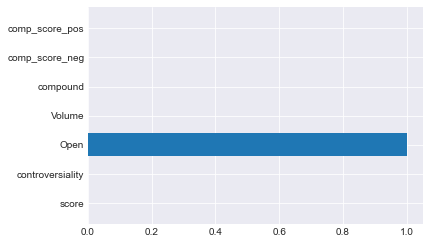

In [30]:
plt.barh(X.columns, xg_reg.feature_importances_)

In [31]:
preds

array([4890.7197, 4890.7197, 4890.7197, 4890.7197, 4890.7197, 4890.7197,
       4890.7197, 4890.7197, 4890.7197, 4890.7197, 4890.7197, 4890.7197,
       4890.7197, 4890.7197, 4890.7197, 4890.7197, 4890.7197, 4890.7197,
       4890.7197, 4890.7197, 4890.7197, 4890.7197, 4890.7197, 4890.7197,
       4890.7197, 4890.7197, 4890.7197, 4890.7197, 4890.7197, 4890.7197,
       4890.7197, 4890.7197, 4890.7197, 4890.7197, 4890.7197, 4890.7197,
       4890.7197, 4890.7197, 4890.7197, 4890.7197, 4890.7197, 4890.7197,
       4890.7197, 4890.7197, 4890.7197, 4890.7197, 4890.7197, 4890.7197,
       4890.7197, 4890.7197, 4890.7197, 4890.7197, 4890.7197, 4890.7197,
       4890.7197, 5538.0894, 5538.0894, 5538.0894, 5538.0894],
      dtype=float32)

In [32]:
# Compute the root mean square error
rmse = np.sqrt(((preds - y_test) ** 2).mean())
print('Root Mean Squared Error: {}'.format(round(rmse, 2)))

# Compute the root mean square error
mse = ((preds - y_test) ** 2).mean()
print('Mean Squared Error: {}'.format(round(mse, 2)))

Root Mean Squared Error: 2489.12
Mean Squared Error: 6195700.99


In [33]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [34]:
mape(y_test,preds)

33.24862682573785

In [37]:
preds = pd.DataFrame(preds)

<AxesSubplot:>

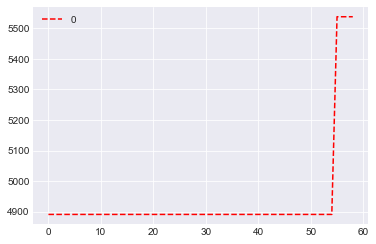

In [39]:

preds.plot(color='r', ls='--', label='Predicted Close Price')